# Kalman Filter
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Kalman Filter is used to estimate the state of a discrete-time controlled process with noises. Kalman Filter is especially useful for unimodal processes.

Kalman filter has two steps, predication and update<sup>[ref](https://www.cs.cornell.edu/courses/cs4758/2012sp/materials/MI63slides.pdf)</sup><br>
#### Predict
\begin{align} \hat {x}_{t|t-1} & = F_t \hat {x}_{t-1|t-1}+B_t u_t \\
P_{t|t-1} & = F_t P_{t-1|t-1}F_t^T +Q_t \end{align}
#### Update
\begin{align} K_t & = P_{t|t-1}H_t^T(H_t P_{t|t-1} H_t^T +R_t)^{-1} \\
\hat {x}_{t|t} & = \hat {x}_{t|t-1}+K_t(y_t-H_t \hat {x}_{t|t-1}) \\
P_{t|t} & =(I-K_t H_t)P_{t|t-1} \end{align}
where <br>
$\hat x$ : Estimated state.<br>
$F$: State transition matrix (i.e., transition between states)<br>
$u$: Control variables<br>
$B$: Control matrix (i.e., mapping control to state variables)<br>
$P$: State variance matrix (i.e., error of estiamtion).<br>
$Q$: Process variance matrix (i.e., error due to process).<br>
$y$: Measurement variables.<br>
$H$: Measurement matrix (i.e., mapping measurements onto state).<br>
$K$: Kalman gain.<br>
$R$: Measurement variance matrix (i.e., error from measurements).<br>
Subscripts are as follows: $t|t$ current time period, $t-1|t-1$ previous time period, and $t|t-1$ are intermediate steps.


### Kalman Filter for robot motion
Let's take a look at how Kalman Filter can be used to estimate the motion of a robot. The input is a set of measurements, and there is no external motions<sup>[ref](https://www.youtube.com/watch?time_continue=101&v=4DMuBp1vNn4)</sup>
```python
measurements = [[1., 4.], [3., 5.], [5., 6.], [7., 7.], [9., 8.], [11., 9.]]
initial_xy = [-1., 3.]
```
The model for this 2D motion problem is that the state is $x=(x,y,vx,vy)^T$, the predication is $x_t=x_{t-1}+vx_{t-1},\ y_t=y_{t-1}+vy_{t-1} $, the measurement is $x=x,\ y=y$, $vx$ and $vy$ are not measured.<br>
By runnint the Kalman Filter ([source code](./KFRobot.py)), we can get a good estimation of the robot's velocity of last location.

In [1]:
import KFRobot
print("Robot last status is:\n", KFRobot.x)
print("The State Variance Matrix is:\n", KFRobot.P)

Robot last status is:
 [[ 10.99868146]
 [  8.99934073]
 [ 19.99780244]
 [  9.99890122]]
The State Variance Matrix is:
 [[ 0.03955609  0.          0.06592682  0.        ]
 [ 0.          0.03955609  0.          0.06592682]
 [ 0.06592682  0.          0.10987804  0.        ]
 [ 0.          0.06592682  0.          0.10987804]]


The above result shows that the robot has an $v_x = 20, \ v_y=10$ and its last position is $x=11, \  y=9$ which matches the given measurements

### The falling body problem
Consider for an object falling under gravational accerlation<sup>[ref](http://biorobotics.ri.cmu.edu/papers/sbp_papers/integrated3/kleeman_kalman_basics.pdf)</sup>. Let $y(t)$ denote the height of the object, then
\begin{equation} \ddot {y}(t)=-g \end{equation}
\begin{equation} \dot{y}(t)=\dot{y}(t_0)-g(t-t_0) \end{equation}
\begin{equation} y(t)=y(t_0)+\dot{y}(t_0)(t-t_0)-\frac{g}{2}(t-t_0)^2 \end{equation}
Incrementally, we got $$y(k+1)=y(k)+\dot{y}(k)-\frac{g}{2}$$ \begin{equation} \dot{y}(k+1)=\dot{y}(k)-g \end{equation}
So we can define the state as $$ \mathbf{x}(k)=[y(k) \ \dot{y}(k)]^T$$
Then the state equation becomes
\begin{array}{rcl} \mathbf{x}(k+1) & = & \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \mathbf{x}(k) + \begin{bmatrix} 0.5 \\ 1 \end{bmatrix} (-g) \\ & = & \mathbf {F} \mathbf{x}(k)+\mathbf{B}\mathbf{u} \end{array}
Assuming we observe or measure the height of the ball directly. The measurement equation is:
\begin{split} \mathbf{z}(k) & = \begin{bmatrix} 1 & 0 \end{bmatrix} \mathbf{x}(k)+R(k) \\ & = \mathbf{H} \mathbf{x}(k)+R(k) \end{split}
The measurement noise $R(k)$ needs to be know for implementin a Kalman filter. 
<br>
Assuming an initial *true* state of position = 100 and velocity=0, g=2. Measurement noise is chose to be 4 here. The code can be found [here [source code]](./KFFallingBody.py). After running the script, we got the following result.


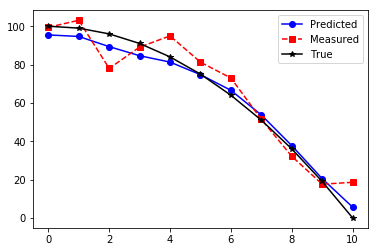

In [3]:
import KFFallingBody as FB
import matplotlib.pyplot as plt
plt.plot(FB.predicted_y, 'bo-', label="Predicted")
plt.plot(FB.measurements, 'rs--', label="Measured")
plt.plot(FB.ypos, 'k*-', label="True")
plt.legend()
plt.show()

# the result shows that although the measurement 
# of the falling path is really noisy, after applying the kalman filter, 
# we can still get some good estimation of the position of the body